In [1]:
import pandas as pd
import json
import tensorflow as tf


In [2]:
with open('Sarcasm_Headlines_Dataset.json','r') as f: 
    data=json.load(f)
links=[]
sentences=[]
labels=[]
for d in data:
    links.append(d['article_link'])
    sentences.append(d['headline'])
    labels.append(d['is_sarcastic'])
print(labels)
# 1 is sarcasm 0 is real

[0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

maxlength=100
vocab_size=10000

X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)
# X_train=sentences
tokenizer=Tokenizer(num_words=vocab_size,oov_token='<00V>')
tokenizer.fit_on_texts(X_train)

train_sequenses=tokenizer.texts_to_sequences(X_train)
train_padded=pad_sequences(train_sequenses,padding='post',maxlen=maxlength,truncating='post')

test_sequenses=tokenizer.texts_to_sequences(X_test)
test_padded=pad_sequences(test_sequenses,padding='post',maxlen=maxlength,truncating='post')
# dict(tokenizer.word_counts)
X_train

['annoying ad turns man pro-whaling',
 "david cameron to scottish people: 'i'll kill myself if you leave'",
 'report: texting while driving okay if you look up every couple seconds',
 'verizon introduces new charge-you-at-whim plan',
 "kim kardashian wants 'everyone to be as honest as kanye'",
 'outrage erupts over report that mark wahlberg made over 1,000 times more than michelle williams',
 'why i launched a platform to empower survivors of bullying',
 'the witching hour, revisited',
 'woman shot by former boyfriend at chicago nordstrom store dies',
 'why sharing your dreams is so important',
 "it isn't easy being a 'humane' slaughterhouse",
 'freshman asks new roommate not to hide masturbation from him',
 'man made clear-headed choice to upload series of online videos explaining how to install surround sound speakers',
 'woman already off to bad start as mother after requesting epidural',
 '91-year-old woman an expert at outliving',
 'this is what happens to your skin during a chemi

In [4]:
import numpy as np
training_padded = np.array(train_padded)
training_labels = np.array(y_train)
testing_padded = np.array(test_padded)

testing_labels = np.array(y_test)



In [5]:
vocab_size=10000
embedding_dim=16

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlength), # input size (21k sentence,100 word each)
    # retuns a 16 dimention vector for each word in each sentence,
    # note that the vector for same words is the same value regardless of its position in sentence
    tf.keras.layers.GlobalAveragePooling1D(), # input size (21k sentence,100 word each, 16 dimension each word)
    # combine the scores of the words into a single sentence score vector
    tf.keras.layers.Dense(24,activation='relu'), # input size (21k sentence,16 dimensions each)
    tf.keras.layers.Dense(1,activation='sigmoid') # input size (21k sentence, 24 parameters)
                                                  # output size (21k sentence, 1 result -sarcasm/not-)
]) #accuracy: 0.9571 - loss: 0.1114 - val_accuracy: 0.8394 - val_loss: 0.5148


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

c:\Users\moata\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
668/668 - 2s - 3ms/step - accuracy: 0.5643 - loss: 0.6797 - val_accuracy: 0.7611 - val_loss: 0.6695
Epoch 2/30
668/668 - 1s - 1ms/step - accuracy: 0.7261 - loss: 0.5548 - val_accuracy: 0.7791 - val_loss: 0.4743
Epoch 3/30
668/668 - 1s - 1ms/step - accuracy: 0.8178 - loss: 0.4161 - val_accuracy: 0.8085 - val_loss: 0.4179
Epoch 4/30
668/668 - 1s - 1ms/step - accuracy: 0.8437 - loss: 0.3647 - val_accuracy: 0.7976 - val_loss: 0.4218
Epoch 5/30
668/668 - 1s - 1ms/step - accuracy: 0.8572 - loss: 0.3319 - val_accuracy: 0.8244 - val_loss: 0.3829
Epoch 6/30
668/668 - 1s - 1ms/step - accuracy: 0.8786 - loss: 0.3005 - val_accuracy: 0.8544 - val_loss: 0.3453
Epoch 7/30
668/668 - 1s - 1ms/step - accuracy: 0.8871 - loss: 0.2790 - val_accuracy: 0.8572 - val_loss: 0.3398
Epoch 8/30
668/668 - 1s - 1ms/step - accuracy: 0.8922 - loss: 0.2650 - val_accuracy: 0.8570 - val_loss: 0.3357
Epoch 9/30
668/668 - 1s - 1ms/step - accuracy: 0.9041 - loss: 0.2435 - val_accuracy: 0.8386 - val_loss: 0.3701
E

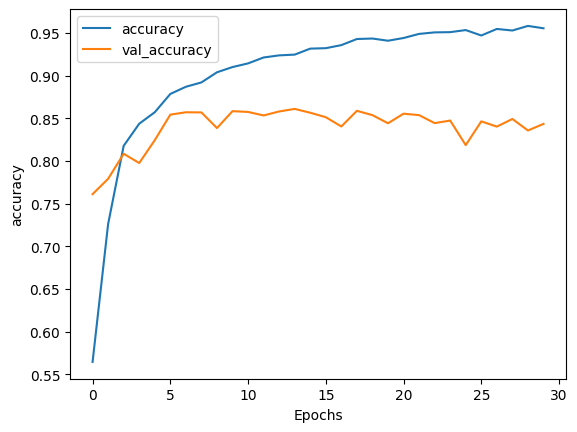

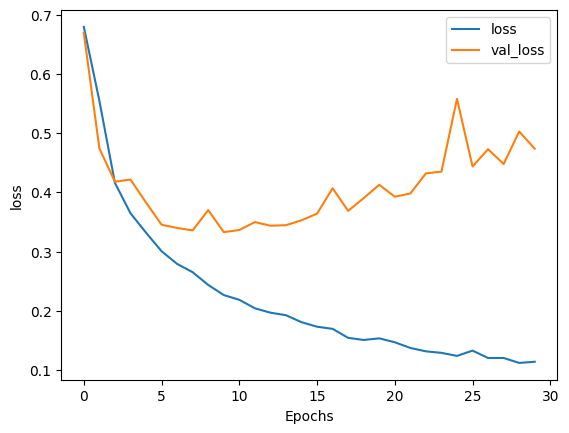

In [7]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [22]:
strings=['chocolate eat I','Why writers must plan to be surprised']
ress=tokenizer.texts_to_sequences(strings)
ress_padded=pad_sequences(ress,padding='post',maxlen=maxlength,truncating='post')
[round(i[0],2) for i in model.predict(ress_padded).tolist()]
# each word ha



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


[0.14, 0.09]

10000